## Praca domowa 4

#### Autor: Jakub Kasprzak

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

In [52]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

In [53]:
df.loc[df.NA_Sales < df.EU_Sales].loc[df.Year > 2015].loc[df.Publisher == "Nintendo"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [54]:
df.groupby("Genre").sum("Global_Sales").sort_values("Global_Sales", ascending = [False]).head(1)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,25955792,6527703.0,861.77,516.48,158.65,184.92,1722.84


c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [55]:
new = df.groupby("Genre").agg("mean")
new = new.loc[new.JP_Sales > new.EU_Sales].JP_Sales
new = new.to_frame()
new = new.reset_index()
new = new.rename(columns = {"Genre":"Typ Gry", "JP_Sales":"Średnia sprzedaż w Japonii"})
new = new.sort_values("Średnia sprzedaż w Japonii")
new

,Typ Gry,Średnia sprzedaż w Japonii
2,Strategy,0.073284
0,Puzzle,0.099439
1,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) Oryginalny wykres wraz ze źródłem

2) Wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) Poprawiony wykres z punktu 2) w Pythonie

4) Uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

In [56]:
from IPython.display import Image

### 1) Oryginalny wykres:

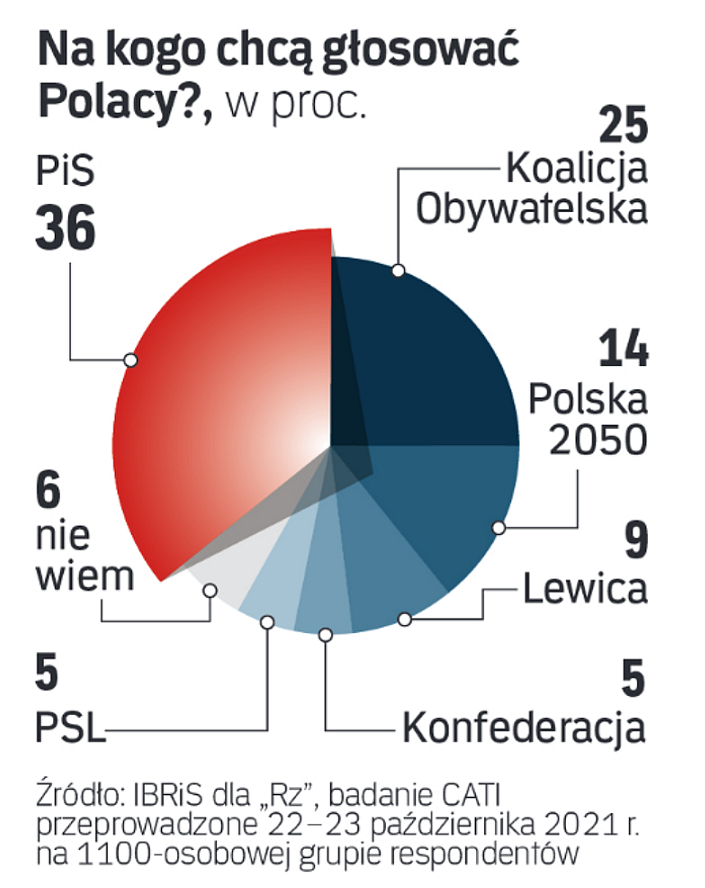

In [57]:
Image(filename="original_plot.png")

Źródło: [Artykuł w serwisie www.rp.pl](https://www.rp.pl/polityka/art19043381-sondaz-ibris-dla-rzeczpospolitej-poparciewzroslo-wszystkim-tylko-nie-konfederacji-i-psl)

### 2) Poprawiony wykres z HW2:

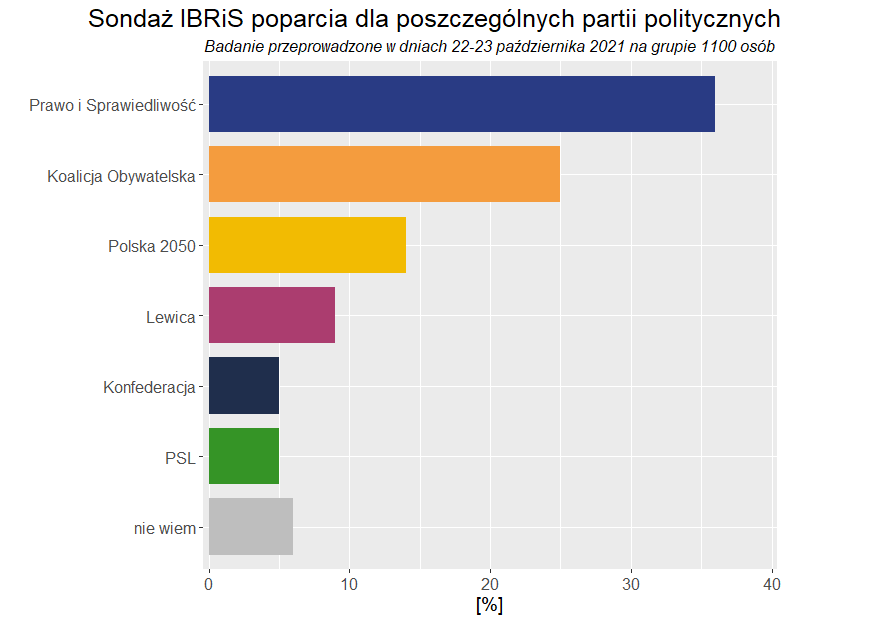

In [63]:
Image(filename="better_plot.png")

[Link do pracy domowej, w której się pojawił](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/JakubowskiWiktor/JakubowskiWiktor.pdf)

### 3) Poprawiony na nowo wykres w Pythonie

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc = {'figure.figsize': (20,12)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "--"})

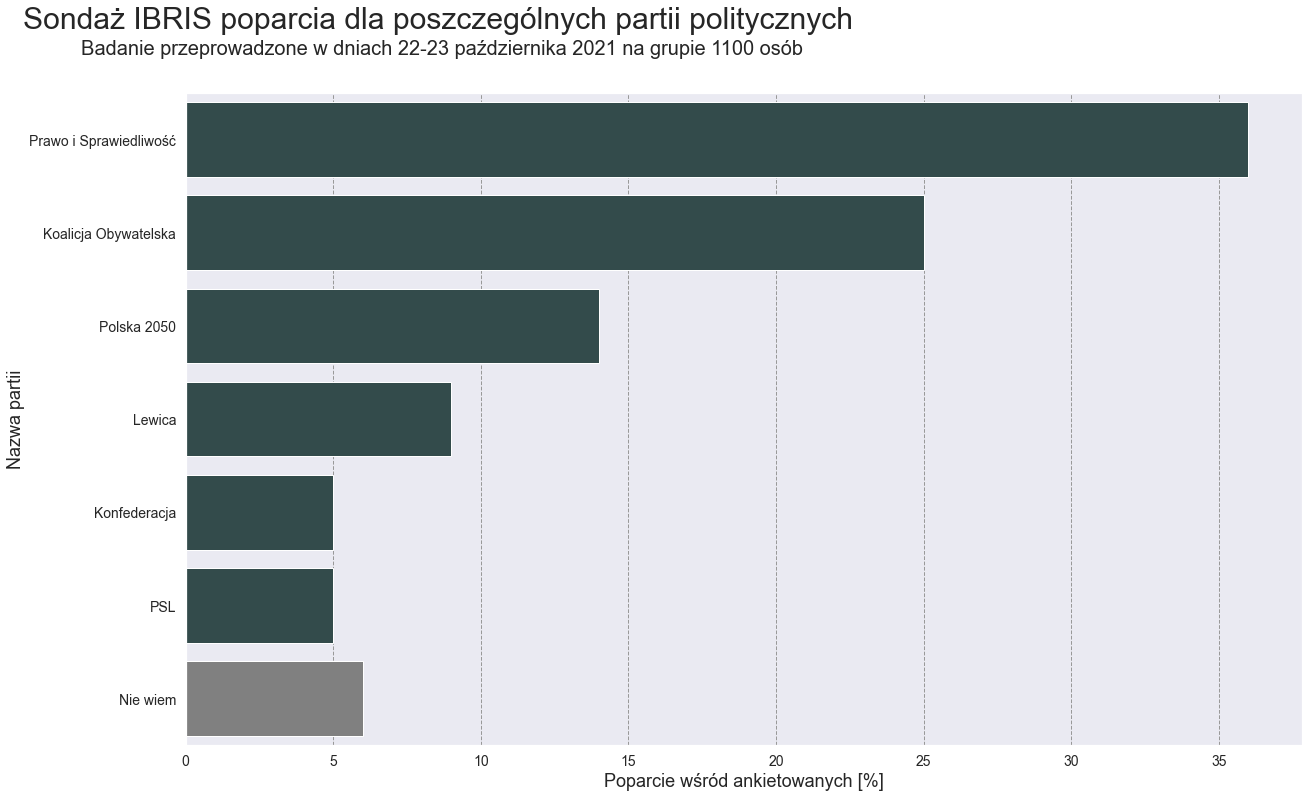

In [68]:
dane = pd.read_csv("ankieta_poparcie.csv")
plt.suptitle("Sondaż IBRIS poparcia dla poszczególnych partii politycznych", fontsize = 30, x = .3, y = .98)
plt.title("Badanie przeprowadzone w dniach 22-23 października 2021 na grupie 1100 osób", fontsize = 20, y = 1.05, x = 0.23)
plt.xlabel("Nazwa partii")
kolory = ['darkslategrey', 'darkslategrey', 'darkslategrey', 'darkslategrey', 'darkslategrey', 'darkslategrey', 'grey']
sns.barplot(y = dane.Nazwa_partii, x = dane.Poparcie, palette = kolory)
plt.ylabel('Nazwa partii', fontsize = 18)
plt.xlabel('Poparcie wśród ankietowanych [%]', fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14);

### 4) Podsumowanie
Poprawiany przeze mnie wykres z HW2 był znacząco lepszy niż wykres oryginalny – wybrano wykres słupkowy zamiast kołowego, zrezygnowano z częściowej trójwymiarowości, poprawiono estetykę całego wykresu. Głównym problemem jest to, że autor wykresu 2. niepotrzebnie zastosował inny kolor słupka dla każdej z partii. Nie wprowadza to żadnej dodatkowej informacji, więc jest to absolutnie zbędne i jedynie rozprasza uwagę odbiorcy. 

Z tego powodu swój wykres postanowiłem zaprezentować w takiej samej formie jak wykres, który poprawiałem, ale zmodyfikowałem paletę kolorów tak, żeby każdy ze słupków miał jednakowy kolor (poza słupkiem reprezentującym osoby niezdecydowane, które warto wyróżnić spośród wszystkich partii). Uwydatniłem też linie siatki, aby łatwiej było odczytać poszczególne wartości. Na wykresie wyjściowym były one dość słabo widoczne. Ostatnią rzeczą którą postanowiłem zrobić, była kapitalizacja pierwszej litery w etykiecie słupka osób niezdecydowanych, aby była pod tym względem spójna z pozostałymi etykietami.
 
 Ogólnie rzecz biorąc, wybrany przeze mnie wykres z HW2 był drastycznie lepszy niż oryginalny, ale wykonano w nim kilka błędów, które postarałem się teraz poprawić, aby ostatecznie otrzymać jak najlepszy wykres.